# Predicting Wine Cultivars

<br><br>

## Summary
---
In this project, we will predict what cultivar a wine was derived from based on its chemical properties.  

The data was sourced from the [UCI Machine Learning Repository](https://doi.org/10.24432/C5PC7J). It contains data about various wines from Italy derived from three different cultivars. Each row represents the chemical and physical properties of a different wine, such as its concentration of alcohol, magnesium level and hue. 

<br>

## Introduction
---
Wine is a beverage that has been enjoyed by humans for thousands of years (Feher et al. 2007). Consequently, humans have a long agricultural history with the grape plant which has led to the development of many different cultivars: grape plants selected and breed for their desirable characteristics (Harutyunyan and Malfeito-Ferreira 2022). Our dataset contains information about twelve chemical properties of 178 red wines made from three grape cultivars in Italy. 

The recorded chemical properties include: 
1. Alcohol content
2. Malic acid (gives the wine a fruity flavour)
3. Ash (left over inorganic matter from the wine-making process)
4. Alkalinity of ash (ability to resist acidification)
5. Magnesium, total phenols (contribute to bitter flavour of wine)
6. Flavanoids (antioxidants that contribute to bitter flavour and aroma of wine)
7. Nonflavanoid phenols (weakly acidic)
8. Proanthocyanins (bitter smell)
9. Color intensity
10. Hue
11. The ratio of OD280 to OD315 of diluted wines (protein concentration)
12. Proline (main amino acid in wine, important aspect of the flavour) (Bai et al. 2019).

Using this dataset, our predictive question is what is the cultivar of an unknown wine based on the chemical properties? Overall, determining which chemical properties distinguish cultivars will help even inexperienced wine drinkers easily identify cultivars.the question

<br>

## Code and Analysis
---

In [1]:
# install.packages("tidyverse")
# install.packages("tidymodels")
install.packages("GGally")
# install.packages("dplyr")
# install.packages("themis")
# install.packages("gridExtra")

also installing the dependencies ‘broom.helpers’, ‘ggstats’


Warning message in install.packages("GGally"):
“installation of package ‘broom.helpers’ had non-zero exit status”
Warning message in install.packages("GGally"):
“installation of package ‘ggstats’ had non-zero exit status”
Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘igraph’


Warning message in install.packages("kknn"):
“installation of package ‘igraph’ had non-zero exit status”
Warning message in install.packages("kknn"):
“installation of package ‘kknn’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [15]:
# imports and libraries 
#library(GGally) # for ggpairs
library(tidyverse) #importing tidyverse
library(tidymodels) # importing tidymodels
library(repr)

library(gridExtra)
#library(kknn)
library(dplyr) # for data wrangling
library(knitr) # to create tables
library(themis) # to balance our cultivar classes out

In [16]:
# Reading in the data from the web
set.seed(5)

raw_data <- read.csv("https://raw.githubusercontent.com/Kaylan-W/dsci_310_project/main/data/wine.data", header= FALSE)
           
# Name the columns based on the dataset description 
col_names <- c("cultivar","alcohol","malicacid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", 
               "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "0D280_0D315_ratio", "proline")
colnames(raw_data) <- col_names


## Exploratory Data Analysis

In [17]:
# Check the number of observations per cultivar
sample_size_cultivar <- raw_data %>%
    group_by(cultivar) %>%
    summarize(sample_size = n())

sample_size_cultivar # class 2 has more observations than the other classes -> need to balance the classes out

cultivar,sample_size
<int>,<int>
1,59
2,71
3,48


In [18]:
# balance the cultivar classes out

# convert cultivar into a factor
raw_data <- raw_data |>
  mutate(cultivar = as.factor(cultivar))

# recipe for balancing
cultivar_balance_recipe <- recipe(cultivar ~ ., data = raw_data) |>
  step_upsample(cultivar, over_ratio = 1, skip = FALSE) |>
  prep()

# execute the balancing
data <- bake(cultivar_balance_recipe, raw_data)

# check the data is balanced
balanced_data <- data |>
  group_by(cultivar) |>
  summarize(n = n())

balanced_data # data has been upsampled so all groups have equal sample size


cultivar,n
<fct>,<int>
1,71
2,71
3,71


In [19]:
# EDA: use a plot to see the relationships between variables
options(repr.plot.width = 12, repr.plot.height = 30) # format the any visualizations to be easily viewable
pairplots <- raw_data %>%
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
pairplots

ERROR: Error in ggpairs(., progress = FALSE): could not find function "ggpairs"


In [20]:
# calculate the mean for each cultivar group
cultivar_mean_table <- raw_data |>
    group_by(cultivar) |>
    summarize(across(alcohol:proline, mean, na.rm = TRUE))

cultivar_mean_table


cultivar,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,0D280_0D315_ratio,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13.74475,2.010678,2.455593,17.03729,106.3390,2.840169,2.9823729,0.290000,1.899322,5.528305,1.0620339,3.157797,1115.7119
2,12.27873,1.932676,2.244789,20.23803,94.5493,2.258873,2.0808451,0.363662,1.630282,3.086620,1.0562817,2.785352,519.5070
3,13.15375,3.333750,2.437083,21.41667,99.3125,1.678750,0.7814583,0.447500,1.153542,7.396250,0.6827083,1.683542,629.8958


In [21]:
# calculate the standard deviation for each cultivar group
cultivar_sd_table <- raw_data |>
    group_by(cultivar) |>
    summarize(across(alcohol:proline, sd, na.rm = TRUE))

cultivar_sd_table


cultivar,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,0D280_0D315_ratio,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4621254,0.6885489,0.2271660,2.546322,10.49895,0.3389614,0.3974936,0.07004924,0.4121092,1.2385728,0.1164826,0.3570766,221.5208
2,0.5379642,1.0155687,0.3154673,3.349770,16.75350,0.5453611,0.7057008,0.12396128,0.6020678,0.9249293,0.2029368,0.4965735,157.2112
3,0.5302413,1.0879057,0.1846902,2.258161,10.89047,0.3569709,0.2935041,0.12413959,0.4088359,2.3109421,0.1144411,0.2721114,115.0970


In [22]:
# calculate the maximum values for each cultivar group
cultivar_max_table <- raw_data |>
    group_by(cultivar) |>
    summarize(across(alcohol:proline, max, na.rm = TRUE))

cultivar_max_table


cultivar,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,0D280_0D315_ratio,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,14.83,4.04,3.22,25,132,3.88,3.93,0.50,2.96,8.9,1.28,4.00,1680
2,13.86,5.80,3.23,30,162,3.52,5.08,0.66,3.58,6.0,1.71,3.69,985
3,14.34,5.65,2.86,27,123,2.80,1.57,0.63,2.70,13.0,0.96,2.47,880


In [23]:
# calculate the minimum values for each cultivar group
cultivar_min_table <- raw_data |>
    group_by(cultivar) |>
    summarize(across(alcohol:proline, min, na.rm = TRUE))

cultivar_min_table


cultivar,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,0D280_0D315_ratio,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,12.85,1.35,2.04,11.2,89,2.20,2.19,0.17,1.25,3.52,0.82,2.51,680
2,11.03,0.74,1.36,10.6,70,1.10,0.57,0.13,0.41,1.28,0.69,1.59,278
3,12.20,1.24,2.10,17.5,80,0.98,0.34,0.17,0.55,3.85,0.48,1.27,415


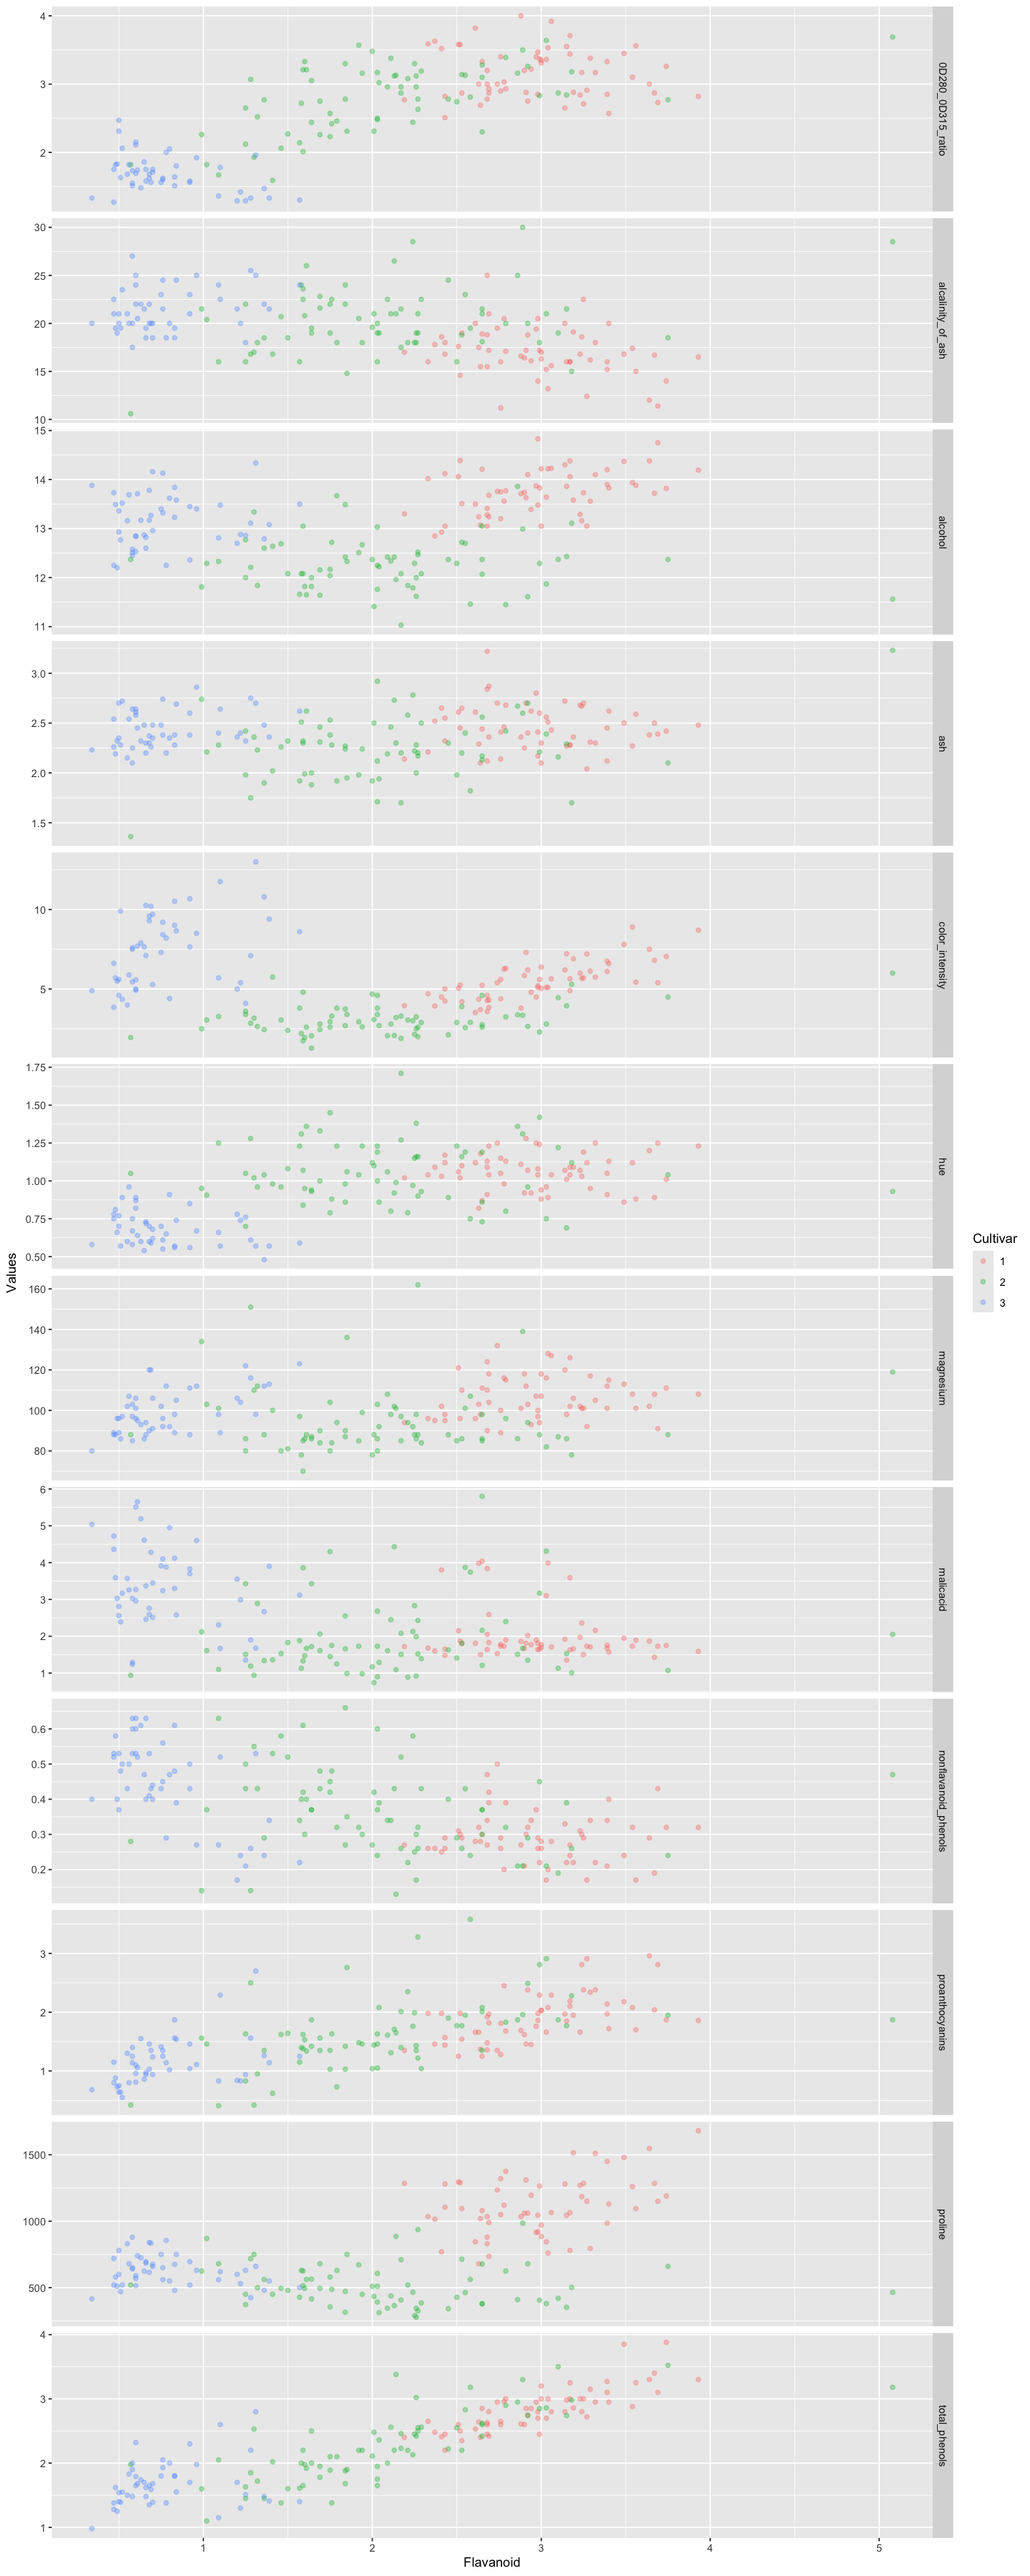

In [24]:
#plotting all variables against flavanoids to see how the cultivars differ
eda_plot_data <- raw_data |>
    relocate(flavanoids, 1)

eda_plot_data <- eda_plot_data |>
        pivot_longer(
        cols= alcohol:proline,
        names_to="factor",
        values_to="values")

eda_plot1 <- eda_plot_data|>
    ggplot(aes(x=flavanoids,y=values,color=cultivar))+
    geom_point(alpha=0.35)+
    facet_grid(factor~.,scales="free")+
    labs(x="Flavanoid",y="Values",color="Cultivar")
eda_plot1


<br><br>

## Methods & Results
---
1. describe in written english the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
2. your report should include code which:
3. loads data from the original source on the web
4. wrangles and cleans the data from it’s original (downloaded) format to the format necessary for the planned classification or clustering analysis
5. performs a summary of the data set that is relevant for exploratory data analysis related to the planned classification analysis
6. creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned classification analysis
7. performs classification or regression analysis
8. creates a visualization of the result of the analysis
9. note: all tables and figure should have a figure/table number and a legend

## K-nearest neighbours regression

In [25]:
data_split <- initial_split(raw_data, prop = 0.75, strata = flavanoids)
data_train <- training(data_split)
data_test <- testing(data_split)


In [33]:
data_recipe <- recipe(flavanoids ~ cultivar, data = raw_data) |>
    step_scale(all_predictors()) |>
    step_center(all_presictors())

data_spec <- nearest_neighbor(weight_func = "rectangular",
                               neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

data_vfold <- vfold_cv(data_train, v = 5, strata = flavanoids)

data_wkflw <- workflow() |>
    add_recipe(data_recipe) |>
    add_model(data_spec)

data_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [34]:
set.seed(5)
gridvals <- tibble(neighbors = seq(from = 1, to = 200, by = 3))

data_results <- data_wkflw |>
  tune_grid(resamples = data_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

# show the results
data_results

ERROR: [1m[33mError[39m in `check_installs()`:[22m
[33m![39m Some package installs are required: 
[36m•[39m 'kknn', 'kknn'


<br>

## Discussion
---
1. summarize what you found
2. discuss whether this is what you expected to find?
3. discuss what impact could such findings have?
4. discuss what future questions could this lead to?

<br>

## References
---
Aeberhard,Stefan and Forina,M.. (1991). Wine. UCI Machine Learning Repository. https://doi.org/10.24432/C5PC7J.

Bai, X., Wang, L., & Li, H. (2019). Identification of red wine categories based on physicochemical properties. International Conference on Educational Technology, Management, and Humanities Science, 1443-1448.
https://doi.org/ 10.25236/etmhs.2019.30



Fehér, J., Lengyel, G., & Lugasi, A. (2007). The cultural history of wine—Theoretical background to wine therapy. Central European Journal of Medicine, 2(4), 379–391. https://doi.org/10.2478/s11536-007-0048



Harutyunyan, M., & Malfeito-Ferreira, M. (2022). The Rise of Wine among Ancient Civilizations across the Mediterranean Basin. Heritage, 5(2), Article 2. https://doi.org/10.3390/heritage50203


